In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib as mpl

In [118]:
#### Primero filtramos las columnas que no tienen peso. Ya sea porque son

In [119]:
def imprimir_proporciones_none(dataframe):
    aux=0
    for i in range(0, len(datos.columns)):
        print("Columna: " + datos.columns[i])
        aux = datos[datos.columns[i]].value_counts()
        if "None" in aux.index:
            print("Hay " + aux["None"].astype(str) + " None")
            print("El porcentaje de None es: " + (aux["None"]*100/aux.sum()).astype(str) + "%")
        else:
            print("No hay None")
        print("")

def filtrar_columnas_nulas(dataframe):
    aux = 0
    ret_list = []
    for i in range(0, len(dataframe.columns)):
        aux = datos[dataframe.columns[i]].value_counts()
        if "None" in aux.index:
            if aux["None"]==len(dataframe):
                print(dataframe.columns[i])
                continue
        ret_list.append(dataframe.columns[i])
    return ret_list

def columnas_invariantes(dataframe):
    for i in range(0,len(dataframe.columns)):
        if (len(dataframe[dataframe.columns[i]].value_counts())==1):
            print("La columna " + dataframe.columns[i] + " tiene un solo dato")
            print("")

In [120]:
datos_csv = pd.read_csv("Entrenamieto_ECI_2020.csv")
datos = datos_csv.replace({"NaT":"None", "nan":"None", "NaN":"None"})

datos = datos[filtrar_columnas_nulas(datos)]
datos["Price"] = pd.to_numeric(datos["Price"], errors="coerce")
datos["Quote_Expiry_Date"] = pd.to_numeric(datos["Price"], errors="coerce")
datos["Last_Modified_Date"] = pd.to_numeric(datos["Price"], errors="coerce")
#datos["Actual_Delivery_Date"] = pd.to_numeric(datos["Actual_Delivery_Date"], errors="coerce")

imprimir_proporciones_none(datos)    
columnas_invariantes(datos)

Last_Activity
Actual_Delivery_Date
Columna: ID
No hay None

Columna: Region
No hay None

Columna: Territory
Hay 4999 None
El porcentaje de None es: 29.497846226470763%

Columna: Pricing, Delivery_Terms_Quote_Appr
No hay None

Columna: Pricing, Delivery_Terms_Approved
No hay None

Columna: Bureaucratic_Code_0_Approval
No hay None

Columna: Bureaucratic_Code_0_Approved
No hay None

Columna: Submitted_for_Approval
No hay None

Columna: Bureaucratic_Code
No hay None

Columna: Account_Created_Date
No hay None

Columna: Source
Hay 9497 None
El porcentaje de None es: 56.039417005959756%

Columna: Billing_Country
Hay 27 None
El porcentaje de None es: 0.15932023366967604%

Columna: Account_Name
No hay None

Columna: Opportunity_Name
No hay None

Columna: Opportunity_ID
No hay None

Columna: Sales_Contract_No
Hay 6973 None
El porcentaje de None es: 41.145925532542634%

Columna: Account_Owner
No hay None

Columna: Opportunity_Owner
No hay None

Columna: Account_Type
Hay 112 None
El porcentaje de 

In [121]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

### En este notebook vamos a analizar geografia.

### AL mismo tiempo vamos a analizar sobre oportunidad, por lo tanto filtramos los duplicados en base a esto.


In [122]:
datos.drop_duplicates('Opportunity_ID',inplace = True)

In [123]:
datos['Region'].value_counts()

EMEA           3241
Americas       2459
APAC           2086
Japan          1906
Middle East     149
Name: Region, dtype: int64

[Text(0, 0.5, 'Apariciones'), Text(0.5, 0, 'Region')]

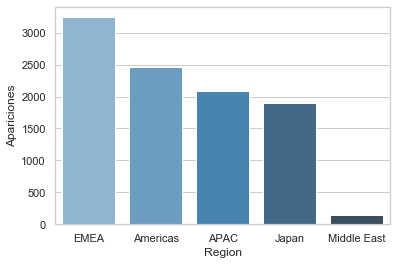

In [124]:
regiones = datos['Region'].value_counts()

ax = sns.barplot(x=regiones.index, y=regiones.values,
                 palette="Blues_d")
ax.set(xlabel='Region', ylabel='Apariciones')

#ax = sns.countplot(x="Region", data=datos)

[Text(0, 0, 'None'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'NW America'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'NE America'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'SE America'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Spain')]

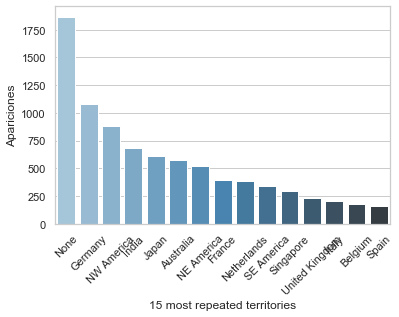

In [125]:
territorios = datos['Territory'].value_counts().head(15)

ax = sns.barplot(x=territorios.index, y=territorios.values,
                 palette="Blues_d")
ax.set(xlabel='15 most repeated territories', ylabel='Apariciones')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [126]:
#### En este ultimo grafico tenemos algo interesante, gran parte de los territorios son NONE.

In [127]:
territorios

None              1867
Germany           1080
NW America         878
India              680
Japan              607
Australia          579
NE America         518
France             393
Netherlands        384
SE America         340
Singapore          293
United Kingdom     228
Italy              208
Belgium            179
Spain              160
Name: Territory, dtype: int64

In [128]:
territorios['None']

1867

In [129]:
territorios.sum

<bound method Series.sum of None              1867
Germany           1080
NW America         878
India              680
Japan              607
Australia          579
NE America         518
France             393
Netherlands        384
SE America         340
Singapore          293
United Kingdom     228
Italy              208
Belgium            179
Spain              160
Name: Territory, dtype: int64>

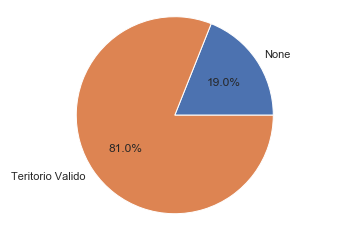

In [130]:
labels = ['None', 'Teritorio Valido']
territorios = datos['Territory'].value_counts()

sizes = [datos['Territory'].value_counts()['None'],
        len(datos['Territory']) - datos['Territory'].value_counts()['None'] ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.show()

### Stage Segun Region.

In [131]:
region = datos[ ['Region', 'Stage'] ]

In [132]:
region.pivot_table(index = 'Region', columns = 'Stage', aggfunc='size')

Stage,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Region,,,,,
APAC,924.0,1155.0,NaN,5.0,2.0
Americas,1358.0,1094.0,4.0,3.0,NaN
EMEA,1737.0,1500.0,1.0,3.0,NaN
Japan,595.0,1290.0,1.0,13.0,7.0
Middle East,105.0,33.0,5.0,6.0,NaN


### Para veitar demoivre (analizado en otros notebooks), se procede a eliminar los casos que no son Closed Lost ni Closed Won.

In [133]:
region = datos[ ['Region', 'Stage'] ]
filtro =  ['Closed Lost','Closed Won' ]
region = region [region['Stage'].isin(filtro) ]
tabla = region.pivot_table(index = 'Region', columns = 'Stage', aggfunc='size')
tabla['Total'] = tabla['Closed Lost'] + tabla ['Closed Won']
tabla = tabla.sort_values("Total", ascending=False)
tabla = tabla.reset_index() 
tabla

Stage,Region,Closed Lost,Closed Won,Total
0,EMEA,1737,1500,3237
1,Americas,1358,1094,2452
2,APAC,924,1155,2079
3,Japan,595,1290,1885
4,Middle East,105,33,138


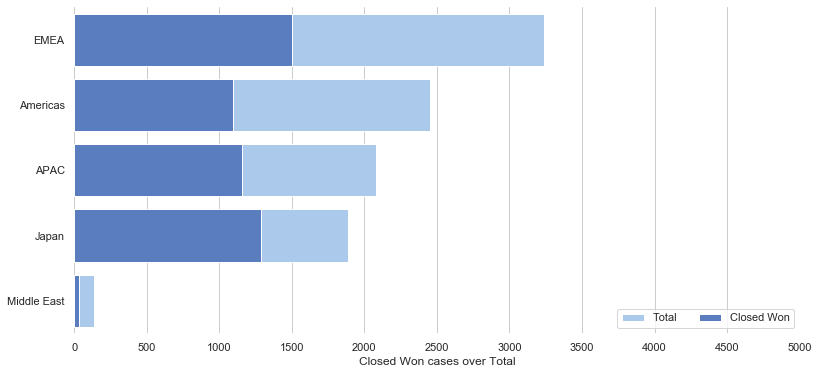

In [134]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 6))

# Load the example car crash dataset
aPlotear = tabla 

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Region", data=aPlotear,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Closed Won", y="Region", data=aPlotear,
            label="Closed Won", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 5000), ylabel="",
       xlabel="Closed Won cases over Total")
ax.set_xticks(np.arange(0, 5001, 500))
sns.despine(left=True, bottom=True)

### Relacion de Closed Won over cases en los 10 territorios mas populares.

In [135]:
top10 = datos['Territory'].value_counts().head(10).index
datos_filtrado = datos[ datos['Territory'].isin(top10) ]
datos_filtrado = datos_filtrado [ ['Territory','Stage' ] ]
filtro = [ 'Closed Lost', 'Closed Won']
tabla = datos_filtrado.pivot_table(index = 'Territory', columns = 'Stage', aggfunc='size')
tabla['Total'] = tabla['Closed Lost'] + tabla ['Closed Won']
tabla = tabla.sort_values("Total", ascending=False)
tabla = tabla.reset_index() 
tabla

Stage,Territory,Closed Lost,Closed Won,Negotiation,Proposal,Qualification,Total
0,None,859.0,992.0,1.0,9.0,6.0,1851.0
1,Germany,488.0,592.0,NaN,NaN,NaN,1080.0
2,NW America,321.0,553.0,4.0,NaN,NaN,874.0
3,India,368.0,310.0,NaN,1.0,1.0,678.0
4,Japan,119.0,483.0,NaN,4.0,1.0,602.0
5,Australia,194.0,383.0,NaN,1.0,1.0,577.0
6,NE America,338.0,180.0,NaN,NaN,NaN,518.0
7,France,277.0,116.0,NaN,NaN,NaN,393.0
8,Netherlands,223.0,160.0,1.0,NaN,NaN,383.0
9,SE America,213.0,124.0,NaN,3.0,NaN,337.0


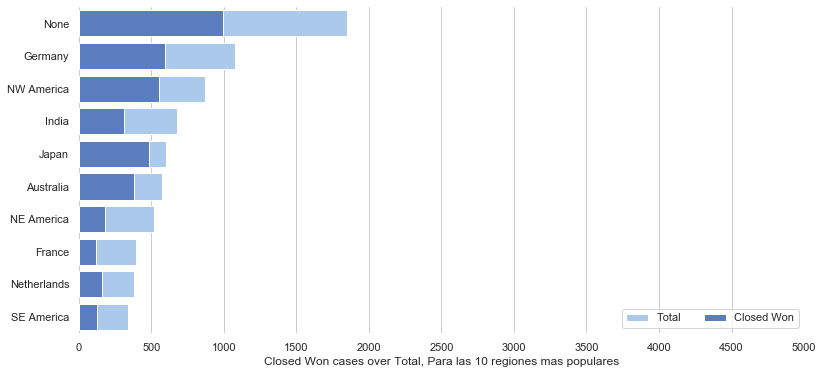

In [136]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 6))

# Load the example car crash dataset
aPlotear = tabla 

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Territory", data=aPlotear,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Closed Won", y="Territory", data=aPlotear,
            label="Closed Won", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 5000), ylabel="",
       xlabel="Closed Won cases over Total, Para las 10 regiones mas populares")
ax.set_xticks(np.arange(0, 5001, 500))
sns.despine(left=True, bottom=True)

### Ahora quiero las regiones con mayor ratio de aprobacion.

In [137]:
datos['Aprobado'] = (datos['Stage'] == "Closed Won")

In [138]:
datos.sample(3)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Aprobado
6216,20992,EMEA,Spain,1,1,1,1,0,Bureaucratic_Code_4,9/5/2013,...,Q2,2017,0,EUR,8925.0,EUR,69297.0,Closed Won,Prod_Category_A_None,True
14313,14223,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,5/20/2017,...,Q3,2018,0,USD,3642.0,USD,122082.0,Closed Won,Prod_Category_A_None,True
12860,13531,EMEA,Germany,1,0,0,0,0,Bureaucratic_Code_5,4/5/2016,...,Q1,2018,3,EUR,1140570.0,EUR,1140570.0,Closed Lost,Prod_Category_A_None,False


In [139]:
grouped = datos[ ['Region', 'Aprobado'] ].groupby("Region").mean()
grouped

,Aprobado
Region,
APAC,0.553691
Americas,0.444896
EMEA,0.462820
Japan,0.676810
Middle East,0.221477


In [ ]:
grouped.iloc[0].values[0]

In [ ]:
fig, axs = plt.subplots(2,3,figsize=(10,10))
plt.subplots_adjust(hspace = 0.8)

labels = ['Closed Won', 'Closed Lost']

sizes = [grouped.iloc[0].values[0],
        1 - grouped.iloc[0].values[0] ]
    
axs[0][0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
#axs[i].axis('equal')
axs[0][0].set_title(grouped.index[0])

sizes = [grouped.iloc[1].values[0],
        1 - grouped.iloc[1].values[0] ]
    
axs[0][1].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
#axs[i].axis('equal')
axs[0][1].set_title(grouped.index[1])


sizes = [grouped.iloc[2].values[0],
        1 - grouped.iloc[2].values[0] ]
    
axs[0][2].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
#axs[i].axis('equal')
axs[0][2].set_title(grouped.index[2])


sizes = [grouped.iloc[3].values[0],
        1 - grouped.iloc[3].values[0] ]
    
axs[1][0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
#axs[i].axis('equal')
axs[1][0].set_title(grouped.index[3])


sizes = [grouped.iloc[4].values[0],
        1 - grouped.iloc[4].values[0] ]
    
axs[1][2].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
#axs[i].axis('equal')
axs[1][2].set_title(grouped.index[4])

axs[1][1].axis('off')

fig.subplots_adjust(wspace=0.05, hspace=0.05)
fig.suptitle("Final state of stage in Region" )


plt.show()


### Total taxable amount por region

In [ ]:
datos_short = datos[['Region','Total_Taxable_Amount', 'Total_Taxable_Amount_Currency']]

### Paso todo a USD al cambio del 15/11/2020

In [ ]:
datos_short['Total_Taxable_Amount_Currency'].value_counts()

In [ ]:
### Me quedo con un elemento por cada operacion.

In [ ]:
datos_short

In [ ]:
def cambio(x):
    currency = x['Total_Taxable_Amount_Currency']
    amount = x['Total_Taxable_Amount']
    if currency == 'USD':
        return (amount)/1000000
    if currency == 'JPY':
        return (amount*0.0096)/1000000
    if currency == 'EUR':
        return (amount*1.18)/1000000
    if currency == 'AUD':
        return (amount*0.73)/1000000
    if currency == 'GBP':
        return (amount*1.29483)/1000000

In [ ]:
datos_short['Total_Taxable_Amount_MILL_USD'] = datos_short.apply(cambio, axis=1)

In [ ]:
datos_short = datos_short[ ['Region', 'Total_Taxable_Amount_MILL_USD'] ]

In [ ]:
grouped = datos_short.groupby('Region').mean()
grouped

In [ ]:
grouped.columns

In [ ]:
grouped.columns = ['Total_Taxable_Amount_Mean']

In [ ]:
grouped

In [ ]:
grouped = grouped.reset_index()
grouped

In [ ]:


ordered_df = grouped.sort_values(by='Total_Taxable_Amount_Mean')
my_range= range(1,len(ordered_df.index)+1)
plt.figure(figsize=(16,8))
import seaborn as sns
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Total_Taxable_Amount_Mean'], color='black')
plt.plot(ordered_df['Total_Taxable_Amount_Mean'], my_range, "o")
 

plt.yticks(my_range, ordered_df['Region'], size = 16)
plt.xticks( np.arange(0, 2.6, 0.2) ) 

plt.title("Mean of taxable amount per Region", loc='center', size = 18)
plt.xlabel('(Millons of USD)', size = 16)
 

0.5536912751677853

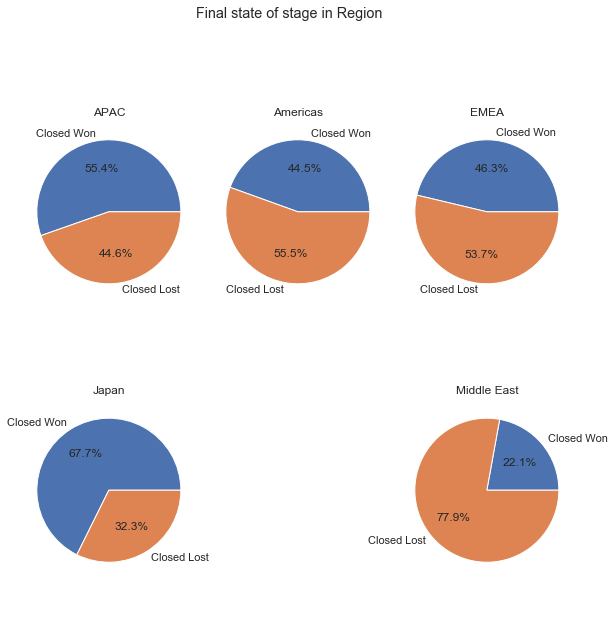

In [141]:
fig, axs = plt.subplots(2,3,figsize=(10,10))
plt.subplots_adjust(hspace = 0.8)

labels = ['Closed Won', 'Closed Lost']

sizes = [grouped.iloc[0].values[0],
        1 - grouped.iloc[0].values[0] ]
    
axs[0][0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
#axs[i].axis('equal')
axs[0][0].set_title(grouped.index[0])

sizes = [grouped.iloc[1].values[0],
        1 - grouped.iloc[1].values[0] ]
    
axs[0][1].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
#axs[i].axis('equal')
axs[0][1].set_title(grouped.index[1])


sizes = [grouped.iloc[2].values[0],
        1 - grouped.iloc[2].values[0] ]
    
axs[0][2].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
#axs[i].axis('equal')
axs[0][2].set_title(grouped.index[2])


sizes = [grouped.iloc[3].values[0],
        1 - grouped.iloc[3].values[0] ]
    
axs[1][0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
#axs[i].axis('equal')
axs[1][0].set_title(grouped.index[3])


sizes = [grouped.iloc[4].values[0],
        1 - grouped.iloc[4].values[0] ]
    
axs[1][2].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
#axs[i].axis('equal')
axs[1][2].set_title(grouped.index[4])

axs[1][1].axis('off')

fig.subplots_adjust(wspace=0.05, hspace=0.05)
fig.suptitle("Final state of stage in Region" )


plt.show()


### Total taxable amount por region

In [142]:
datos_short = datos[['Region','Total_Taxable_Amount', 'Total_Taxable_Amount_Currency']]

### Paso todo a USD al cambio del 15/11/2020

In [143]:
datos_short['Total_Taxable_Amount_Currency'].value_counts()

USD    4785
EUR    3135
JPY    1605
AUD     315
GBP       1
Name: Total_Taxable_Amount_Currency, dtype: int64

In [144]:
### Me quedo con un elemento por cada operacion.

In [145]:
datos_short

,Region,Total_Taxable_Amount,Total_Taxable_Amount_Currency
0,EMEA,5272800.0,EUR
1,EMEA,48230.0,EUR
2,Americas,83865.6,USD
3,Americas,7421881.5,USD
4,Americas,13357192.5,USD
...,...,...,...
16939,EMEA,401700.0,EUR
16940,Americas,21332500.0,USD
16942,EMEA,299715.0,EUR
16945,Americas,0.0,USD


In [146]:
def cambio(x):
    currency = x['Total_Taxable_Amount_Currency']
    amount = x['Total_Taxable_Amount']
    if currency == 'USD':
        return (amount)/1000000
    if currency == 'JPY':
        return (amount*0.0096)/1000000
    if currency == 'EUR':
        return (amount*1.18)/1000000
    if currency == 'AUD':
        return (amount*0.73)/1000000
    if currency == 'GBP':
        return (amount*1.29483)/1000000

In [147]:
datos_short['Total_Taxable_Amount_MILL_USD'] = datos_short.apply(cambio, axis=1)

/home/riedel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [148]:
datos_short = datos_short[ ['Region', 'Total_Taxable_Amount_MILL_USD'] ]

In [149]:
grouped = datos_short.groupby('Region').mean()
grouped

,Total_Taxable_Amount_MILL_USD
Region,
APAC,1.803122
Americas,2.171713
EMEA,1.482286
Japan,0.212174
Middle East,2.012382


In [150]:
grouped.columns

Index(['Total_Taxable_Amount_MILL_USD'], dtype='object')

In [151]:
grouped.columns = ['Total_Taxable_Amount_Mean']

In [152]:
grouped

,Total_Taxable_Amount_Mean
Region,
APAC,1.803122
Americas,2.171713
EMEA,1.482286
Japan,0.212174
Middle East,2.012382


In [153]:
grouped = grouped.reset_index()
grouped

,Region,Total_Taxable_Amount_Mean
0,APAC,1.803122
1,Americas,2.171713
2,EMEA,1.482286
3,Japan,0.212174
4,Middle East,2.012382


Text(0.5, 0, '(Millons of USD)')

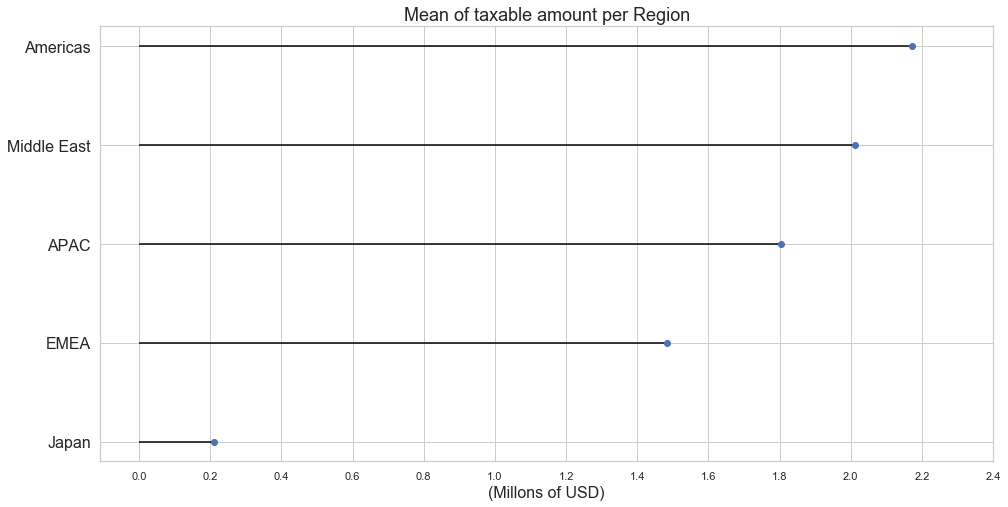

In [154]:


ordered_df = grouped.sort_values(by='Total_Taxable_Amount_Mean')
my_range= range(1,len(ordered_df.index)+1)
plt.figure(figsize=(16,8))
import seaborn as sns
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Total_Taxable_Amount_Mean'], color='black')
plt.plot(ordered_df['Total_Taxable_Amount_Mean'], my_range, "o")
 

plt.yticks(my_range, ordered_df['Region'], size = 16)
plt.xticks( np.arange(0, 2.6, 0.2) ) 

plt.title("Mean of taxable amount per Region", loc='center', size = 18)
plt.xlabel('(Millons of USD)', size = 16)
 